In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf

In [8]:
symbol='AXISBANK.NS'
start=dt.datetime(2021,7,1)
end=dt.datetime(2022,1,28)
stk_data=yf.download(symbol,start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420410,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050232,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060
2022-01-24,715.000000,716.400024,688.200012,704.599976,702.811890,8812501


# Data Collection

In [10]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [11]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000
2022-01-24,715.000000,716.400024,688.200012,704.599976


# Data Preprocessing

In [12]:
column="Close"
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
data1=ms.fit_transform(stk_data[[column]])
print("Length : " ,data1.shape)

Length :  (144, 1)


In [13]:
len(data1)

144

# Train & Test split both input and output is same

In [14]:
training_size=round(len(data1)*0.80)
print(training_size)
x_train=data1[:training_size]
x_test=data1[training_size:]
print("x_train length : ", x_train.shape)
print("x_test length : " , x_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length : ", y_train.shape)
print("y_test length : " , y_test.shape)

115
x_train length :  (115, 1)
x_test length :  (29, 1)
y_train length :  (115, 1)
y_test length :  (29, 1)


In [19]:
print(y_train)

[[0.49149503]
 [0.51314458]
 [0.56314433]
 [0.55283505]
 [0.57628891]
 [0.53247448]
 [0.49613402]
 [0.52835052]
 [0.6167527 ]
 [0.61314439]
 [0.6342786 ]
 [0.61881468]
 [0.53659813]
 [0.48788672]
 [0.49304136]
 [0.53762912]
 [0.5422681 ]
 [0.41546411]
 [0.37010334]
 [0.34097951]
 [0.2979384 ]
 [0.36108273]
 [0.45103093]
 [0.52938151]
 [0.50618563]
 [0.46262887]
 [0.53814446]
 [0.56932996]
 [0.56546398]
 [0.54768041]
 [0.56082499]
 [0.57164961]
 [0.54458775]
 [0.53247448]
 [0.45953621]
 [0.43814433]
 [0.49097938]
 [0.45335058]
 [0.49097938]
 [0.5221652 ]
 [0.68530934]
 [0.69793827]
 [0.76185592]
 [0.78144349]
 [0.75721662]
 [0.77164955]
 [0.70489691]
 [0.74020637]
 [0.71675283]
 [0.70747423]
 [0.73866005]
 [0.72319613]
 [0.78092784]
 [0.80541237]
 [0.74613402]
 [0.7435567 ]
 [0.70747423]
 [0.83015489]
 [0.75747429]
 [0.75180431]
 [0.71185586]
 [0.67551572]
 [0.59510316]
 [0.60335077]
 [0.65927848]
 [0.67783505]
 [0.65902081]
 [0.64948454]
 [0.67448472]
 [0.70128891]
 [0.7528353 ]
 [0.73

In [25]:
import pandas as pd
Actual_y_train=pd.DataFrame(index=range(len(y_train)),columns=["Close"])
for i in range(len(y_train)):
    Actual_y_train.iloc[i]=y_train[i]
print(Actual_y_train)

        Close
0    0.491495
1    0.513145
2    0.563144
3    0.552835
4    0.576289
..        ...
110  0.190464
111  0.272681
112  0.308248
113  0.316495
114  0.301804

[115 rows x 1 columns]


In [15]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
lags=[1,2,3,4]
trends=['n','t','c','ct']
for i in lags:
    for td in trends:
        model=AutoReg(x_train,lags=i,trend=td)
        model_fit=model.fit()
        # making prediction
        y_pred=model_fit.predict(len(x_train),len(data1)-1)
        from stockFunctions import rmsemape
        print("Lags : {} , Tred : {} ". format(i,td))
        rmsemape(y_test,y_pred)
        print("_______________________________________")

Lags : 1 , Tred : n 
RMSE-Testset: 0.17469631537953986
maPe-Testset: 0.837827872469714
_______________________________________
Lags : 1 , Tred : t 
RMSE-Testset: 0.18443848166417132
maPe-Testset: 0.8468560356050291
_______________________________________
Lags : 1 , Tred : c 
RMSE-Testset: 0.15479844835466888
maPe-Testset: 0.9141076149675359
_______________________________________
Lags : 1 , Tred : ct 
RMSE-Testset: 0.19981669331978108
maPe-Testset: 0.8633514560237955
_______________________________________
Lags : 2 , Tred : n 
RMSE-Testset: 0.1837154841262054
maPe-Testset: 0.8348130514168346
_______________________________________
Lags : 2 , Tred : t 
RMSE-Testset: 0.15395466472520414
maPe-Testset: 0.8155524119935292
_______________________________________
Lags : 2 , Tred : c 
RMSE-Testset: 0.16898642158275531
maPe-Testset: 1.009578073491122
_______________________________________
Lags : 2 , Tred : ct 
RMSE-Testset: 0.18052764635120863
maPe-Testset: 0.8521342115890455
_________________

C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To

In [16]:
i=1
td='ct'
model=AutoReg(x_train,lags=i,trend=td)
model_fit=model.fit()
        # making prediction
y_pred=model_fit.predict(len(x_train),len(data1)-1)
from stockFunctions import rmsemape
print("Lags : {} , Tred : {} ". format(i,td))
rmsemape(y_test,y_pred)
print("_______________________________________")

Lags : 1 , Tred : ct 
RMSE-Testset: 0.19981669331978108
maPe-Testset: 0.8633514560237955
_______________________________________


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


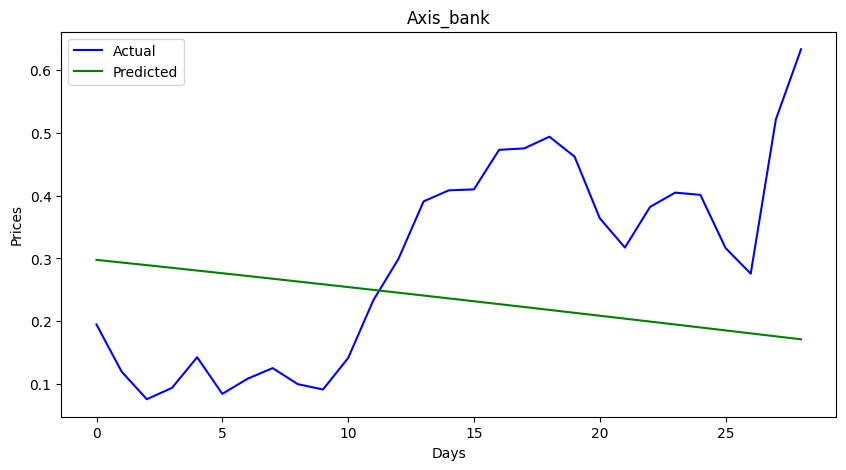

In [17]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Axis_bank","Days","Prices")


In [27]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [28]:
aTestNormTable

,Close
0,0.194846
1,0.119845
2,0.076031
3,0.094072
4,0.142784
5,0.084536
6,0.108505
7,0.125516
8,0.1
9,0.091495


In [30]:
actual_stock_price_test_ori=ms.inverse_transform(aTestNormTable)

In [31]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [34]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

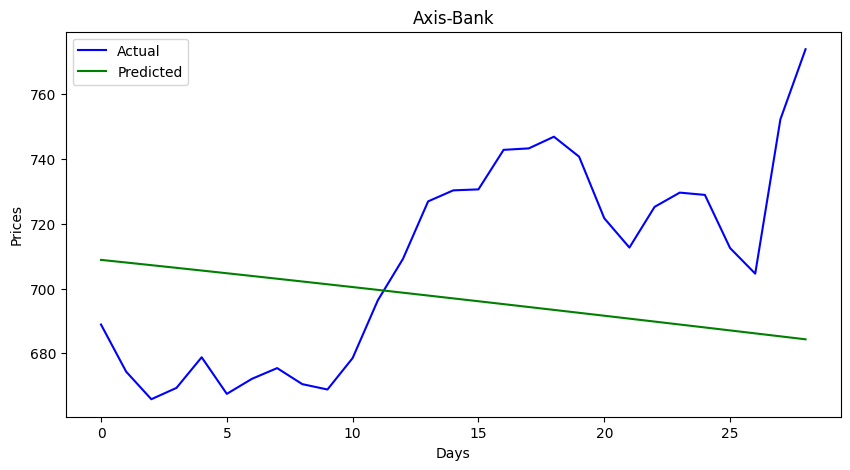

In [35]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Axis-Bank","Days","Prices")

In [36]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 38.76443850403755
maPe-Testset: 0.04917716677548714


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [38]:
forecast

array([0.16657305, 0.16182356, 0.15706534, 0.15229879])

In [40]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [41]:
forecast_stock_price_test_oriF

,Closefore
0,683.415147
1,682.493746
2,681.570651
3,680.645941


In [42]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

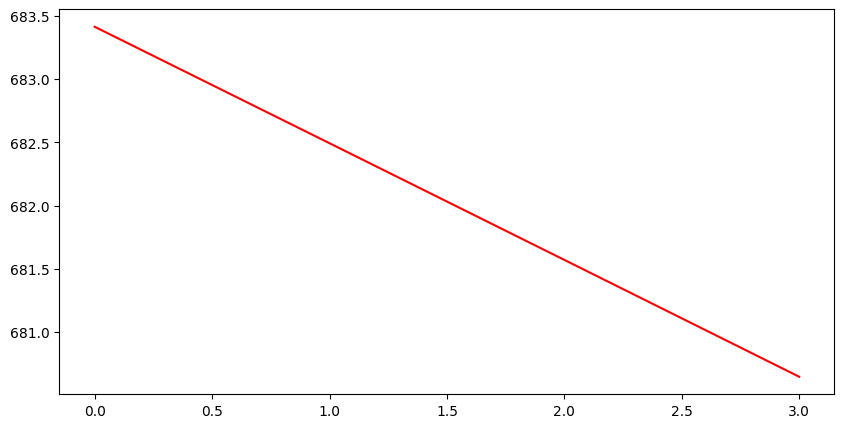

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")